In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

%matplotlib inline

In [2]:
Temperature = ctrl.Antecedent(np.arange(-10, 51, 1), 'Temperature')
Humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'Humidity')
Fan_speed = ctrl.Consequent(np.arange(0, 21, 1), 'Fan_speed')

In [3]:
# Custom membership functions can be built interactively with a familiar, pythonic API
Temperature['V_V_Cold']   = fuzz.trimf(Temperature.universe, [-10, -5, 0])
Temperature['V_Cold']   = fuzz.trimf(Temperature.universe, [-2, 3, 8])
Temperature['Cold']   = fuzz.trimf(Temperature.universe, [5, 8, 13])
Temperature['Normal'] = fuzz.trimf(Temperature.universe, [10, 17, 23])
Temperature['Hot']   = fuzz.trimf(Temperature.universe, [20, 27, 30])
Temperature['V_Hot']    = fuzz.trimf(Temperature.universe, [28, 33, 38])
Temperature['V_V_Hot']   = fuzz.trimf(Temperature.universe, [35, 50, 50])

Humidity['V_Low']  = fuzz.trimf(Humidity.universe, [0, 0, 10])
Humidity['Low']       = fuzz.trimf(Humidity.universe, [5, 20, 30])
Humidity['Normal']        = fuzz.trimf(Humidity.universe, [25, 40, 55])
Humidity['High']      = fuzz.trimf(Humidity.universe, [50, 65 , 75])
Humidity['V_High']      = fuzz.trimf(Humidity.universe, [70, 100, 100])

Fan_speed['V_Low']        = fuzz.trimf(Fan_speed.universe, [0, 0, 7.5])
Fan_speed['Low']      = fuzz.trimf(Fan_speed.universe, [5, 7.5, 10])
Fan_speed['Normal'] = fuzz.trimf(Fan_speed.universe, [7.5, 10, 12.5])
Fan_speed['High']        = fuzz.trimf(Fan_speed.universe, [10, 12.5, 15])
Fan_speed['V_high']      = fuzz.trimf(Fan_speed.universe, [12.5, 15, 17.5])
Fan_speed['V_V_High'] = fuzz.trimf(Fan_speed.universe, [17.5, 20, 20])

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


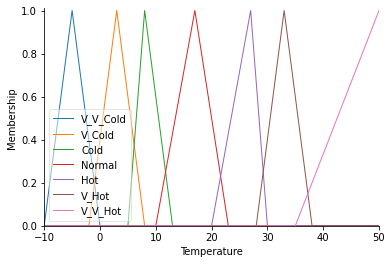

In [5]:
Temperature.view()

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


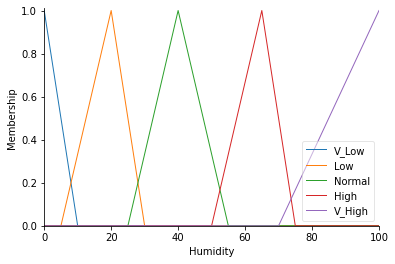

In [51]:
Humidity.view()

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


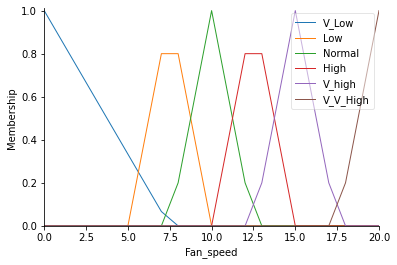

In [6]:
Fan_speed.view()

In [7]:
# rules
rule1 = ctrl.Rule(Temperature['V_V_Cold'] , Fan_speed['V_Low'])
rule2 = ctrl.Rule(Temperature['V_Cold'] , Fan_speed['V_Low'])
rule3 = ctrl.Rule((Temperature['Cold'] | Temperature['Normal']) & Humidity['V_Low'], Fan_speed['Low'])
rule4 = ctrl.Rule((Temperature['Normal'] | Temperature['Hot']) & (Humidity['Normal'] | Humidity['High']), Fan_speed['Normal'])
rule5 = ctrl.Rule(Temperature['Hot'] & Humidity['V_High'], Fan_speed['High'])
rule6 = ctrl.Rule(Temperature['V_Hot'], Fan_speed['V_high'])
rule7 = ctrl.Rule(Temperature['V_V_Hot'] , Fan_speed['V_V_High'])

In [8]:
Fan_Ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])

In [9]:
Fan = ctrl.ControlSystemSimulation(Fan_Ctrl)

Fan Speed:  3.0931034482758624


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


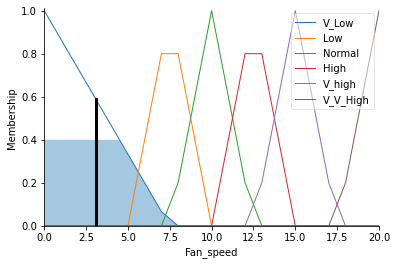

In [10]:
# run inputs:
Fan.input['Temperature'] = 0
Fan.input['Humidity'] = 20

Fan.compute()

print('Fan Speed: ',Fan.output['Fan_speed'])

Fan_speed.view(sim=Fan)

Fan Speed:  14.999999999999996


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


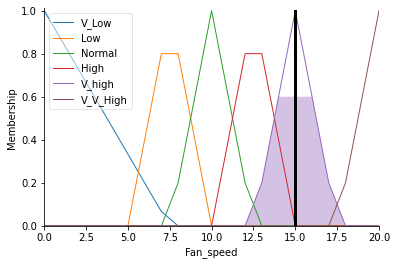

In [68]:
# run inputs:
Fan.input['Temperature'] = 35
Fan.input['Humidity'] = 88

Fan.compute()

print('Fan Speed: ',Fan.output['Fan_speed'])

Fan_speed.view(sim=Fan)